<a href="https://colab.research.google.com/github/mironafanasenko/pogect/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9C%D0%B8%D1%80%D0%BE%D0%BD_%D0%90%D1%84%D0%B0%D0%BD%D0%B0%D1%81%D0%B5%D0%BD%D0%BA%D0%BE_task28_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Занятие 28. Кластеризация. Решение задач.



Теоретический материал с описанием алгоритмов и задач кластеризации размещён в презентации к занятию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Использование метрик для выявления **похожих** объектов и заполнения пропущенных данных

На прошлом занятии мы разобрали алгоритм заполнения пропущенных данных на основе различных метрик. 

In [2]:
df = pd.read_csv("imdb.csv")

Заменим пропуски на `np.nan`.

In [3]:
df = df.replace('-', np.nan)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12338 entries, 0 to 12337
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NAME    12338 non-null  object 
 1   RATING  12338 non-null  float64
 2   VOTES   12338 non-null  int64  
 3   GENRE   12338 non-null  object 
 4   YEAR    12338 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 482.1+ KB


In [5]:
col = ['Date', 'Raiting',]

In [6]:
enc = OrdinalEncoder()

In [7]:
T = np.array([['NAME', 'RATING'],
              ['VOTES', 'YEAR']])

In [8]:
enc.fit(T)

OrdinalEncoder()

In [9]:
enc.transform(T)

array([[0., 0.],
       [1., 1.]])

In [10]:
df.head()

,NAME,RATING,VOTES,GENRE,YEAR
0,отверженные 25ая годовщина мюзикла,8.8,4660,"Drama, Music, Musical",2010
1,начало,8.8,1858608,"Action, Adventure, Sci-Fi",2010
2,душа и персона,8.6,2856,"Action, Crime, Thriller",2010
3,плохой герой,8.4,1200,"Comedy, Crime, Drama",2010
4,жизненный путь,8.4,2113,"Action, Drama",2010


In [11]:
df["RATING"]

0        8.8
1        8.8
2        8.6
3        8.4
4        8.4
        ... 
12333    1.7
12334    1.7
12335    1.2
12336    1.2
12337    1.0
Name: RATING, Length: 12338, dtype: float64

In [12]:
a = df["RATING"]
b = df["VOTES"]

In [13]:
x = a
y = b

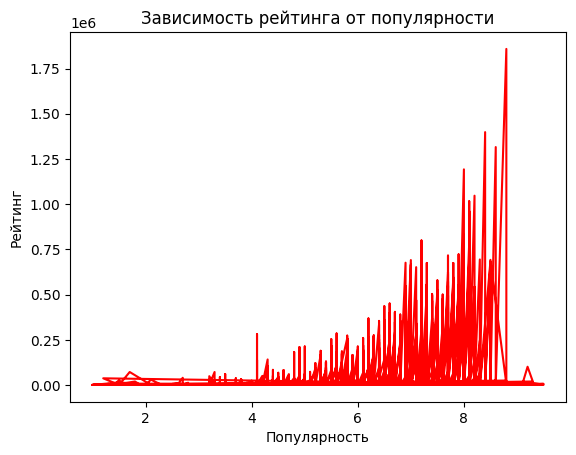

In [14]:
plt.title("Зависимость рейтинга от популярности")
plt.xlabel("Популярность")
plt.ylabel("Рейтинг")
plt.plot(x, y, color ="red")
plt.show()

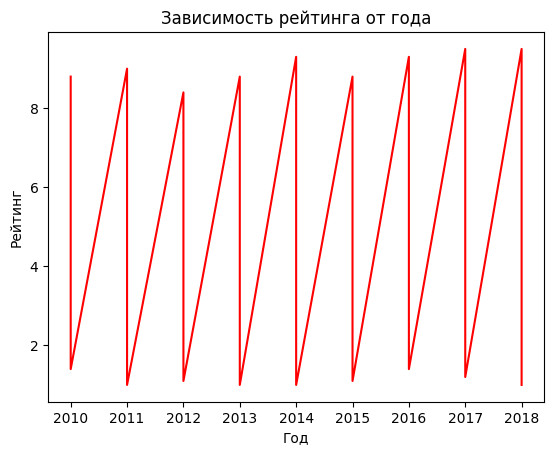

In [15]:
a = df["RATING"]
b = df["YEAR"]
x = a
y = b
plt.title("Зависимость рейтинга от года")
plt.xlabel("Год")
plt.ylabel("Рейтинг")
plt.plot(y, x, color ="red")
plt.show()

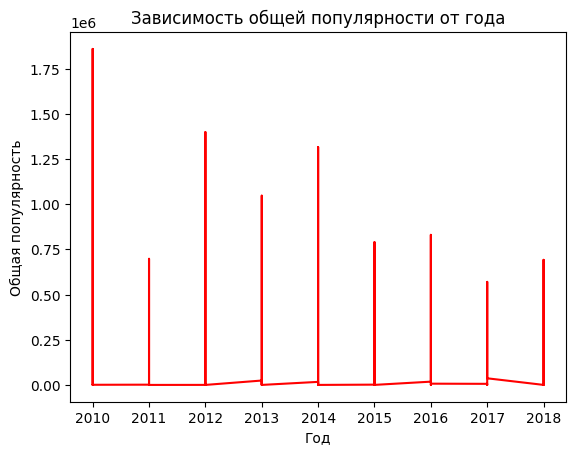

In [16]:
a = df["VOTES"]
b = df["YEAR"]
x = a
y = b
plt.title("Зависимость общей популярности от года")
plt.xlabel("Год")
plt.ylabel("Общая популярность")
plt.plot(y, x, color ="red")
plt.show()

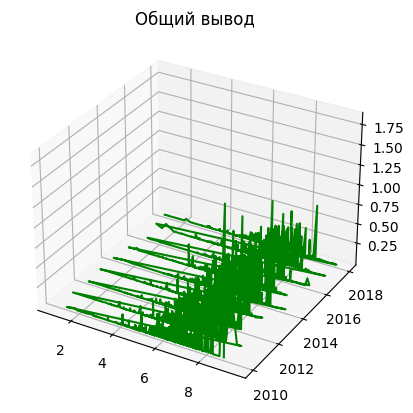

In [17]:
X = df["YEAR"]
Y = df["VOTES"]
Z = df["RATING"]

fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot3D(Z, X, Y, 'green')
ax.set_title('Общий вывод')
plt.show()





In [ ]:
a = df["YEAR"]

In [ ]:
a

0        2010
1        2010
2        2010
3        2010
4        2010
         ... 
12333    2018
12334    2018
12335    2018
12336    2018
12337    2018
Name: YEAR, Length: 12338, dtype: int64

2010